# Funciones de AWS Lambda (count de eventos)

Analizamos los counts de eventos de las funciones

## Cargar dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generamos DF a partir de CSV de entrada
input_file = '../csvs/events.csv'
df = pd.read_csv(input_file)
df

,project_id,function_name,event
0,0xEduardo_nodeless_serverless,hello,s3
1,0xEduardo_nodeless_serverless,hello,s3
2,0xayot_waas_serverless,hello,http
3,0xayot_waas_serverless,retrieveAddres,http
4,0xayot_waas_serverless,generateAddress,http
...,...,...,...
2594,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello,httpApi
2595,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello2,httpApi
2596,Nyholm_sfhackday_com_serverless,website,http
2597,Nyholm_sfhackday_com_serverless,website,http


In [3]:
filtered_df = df.dropna(subset=['event'])
filtered_df

,project_id,function_name,event
0,0xEduardo_nodeless_serverless,hello,s3
1,0xEduardo_nodeless_serverless,hello,s3
2,0xayot_waas_serverless,hello,http
3,0xayot_waas_serverless,retrieveAddres,http
4,0xayot_waas_serverless,generateAddress,http
...,...,...,...
2594,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello,httpApi
2595,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello2,httpApi
2596,Nyholm_sfhackday_com_serverless,website,http
2597,Nyholm_sfhackday_com_serverless,website,http


In [4]:
# events supported by Serverless Framework
supported_events = [
'httpApi',
'http',
'activemq',
'alb',
'alexaSkill',
'alexaSmartHome',
'cloudwatchEvent',
'cloudwatchLog',
'cloudFront',
'cognitoUserPool',
'eventBridge',
'iot',
'iotFleetProvisioning',
'kafka',
'stream',
'msk',
'rabbitmq',
's3',
'schedule',
'sns',
'sqs',
'websocket'
]
supported_events

['httpApi',
 'http',
 'activemq',
 'alb',
 'alexaSkill',
 'alexaSmartHome',
 'cloudwatchEvent',
 'cloudwatchLog',
 'cloudFront',
 'cognitoUserPool',
 'eventBridge',
 'iot',
 'iotFleetProvisioning',
 'kafka',
 'stream',
 'msk',
 'rabbitmq',
 's3',
 'schedule',
 'sns',
 'sqs',
 'websocket']

In [5]:
filtered_df = filtered_df[filtered_df['event'].isin(supported_events)]
filtered_df

,project_id,function_name,event
0,0xEduardo_nodeless_serverless,hello,s3
1,0xEduardo_nodeless_serverless,hello,s3
2,0xayot_waas_serverless,hello,http
3,0xayot_waas_serverless,retrieveAddres,http
4,0xayot_waas_serverless,generateAddress,http
...,...,...,...
2594,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello,httpApi
2595,tsanghan_sctp-ce6-mod3_6-serverless-app_server...,hello2,httpApi
2596,Nyholm_sfhackday_com_serverless,website,http
2597,Nyholm_sfhackday_com_serverless,website,http


In [6]:
event_counts_df = df.drop(columns=['function_name'])
event_counts_df['common_id'] = event_counts_df['project_id'].str.replace(r'_\d+$', '', regex=True)
event_counts_df = event_counts_df.groupby(['common_id', 'event']).size().reset_index(name='count')
event_counts_df


,common_id,event,count
0,0xEduardo_nodeless_serverless,s3,2
1,0xayot_waas_serverless,http,3
2,20minutes_serverless-github-check_serverless,http,5
3,2amigos_laravel-mail-api_serverless,httpApi,1
4,AbstractPlay_node-backend_serverless,eventBridge,8
...,...,...,...
658,zkcloudworker_zkcloudworker-aws_serverless,schedule,1
659,zommerfelds_website-cz_serverless,http,1
660,zotoio_github-task-manager_serverless,cloudwatchLog,1
661,zotoio_github-task-manager_serverless,http,1


In [7]:
grouped_df = event_counts_df.groupby('common_id')['count'].sum().reset_index()
grouped_df

,common_id,count
0,0xEduardo_nodeless_serverless,2
1,0xayot_waas_serverless,3
2,20minutes_serverless-github-check_serverless,5
3,2amigos_laravel-mail-api_serverless,1
4,AbstractPlay_node-backend_serverless,10
...,...,...
548,zacbe_url-shortener_serverless,4
549,zinxon_CantekWebApp-BE_serverless,1
550,zkcloudworker_zkcloudworker-aws_serverless,5
551,zommerfelds_website-cz_serverless,1


In [8]:
# guardamos el nuevo DataFrame en un nuevo CSV
output_file = '../temp_data/event_counts_per_repo.csv'
grouped_df.to_csv(output_file, index=False)

## Análisis estadístico

In [9]:
# resumen estadístico de la columna 'count'
events_count_summary = grouped_df['count'].describe()

# máximo
max_value = grouped_df['count'].max()

# mínimo
min_value = grouped_df['count'].min()

# rango (diferencia entre máximo y mínimo)
range_value = max_value - min_value

# mediana
median_value = grouped_df['count'].median()

# varianza
variance_value = grouped_df['count'].var()

# desviación estándar
std_deviation_value = grouped_df['count'].std()

# para imprimir los resultados sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# mostrar los resultados
print("Resumen estadístico:")
print(events_count_summary)
print("\nMáx.:", max_value)
print("Mín.:", min_value)
print("Rango:", range_value)
print("Median:", median_value)
print("Varianza:", variance_value)
print("Standard deviation:", std_deviation_value)

Resumen estadístico:
count   553.00
mean      3.93
std       5.96
min       1.00
25%       1.00
50%       2.00
75%       4.00
max      36.00
Name: count, dtype: float64

Máx.: 36
Mín.: 1
Rango: 35
Median: 2.0
Varianza: 35.499377571612015
Standard deviation: 5.958135410647531


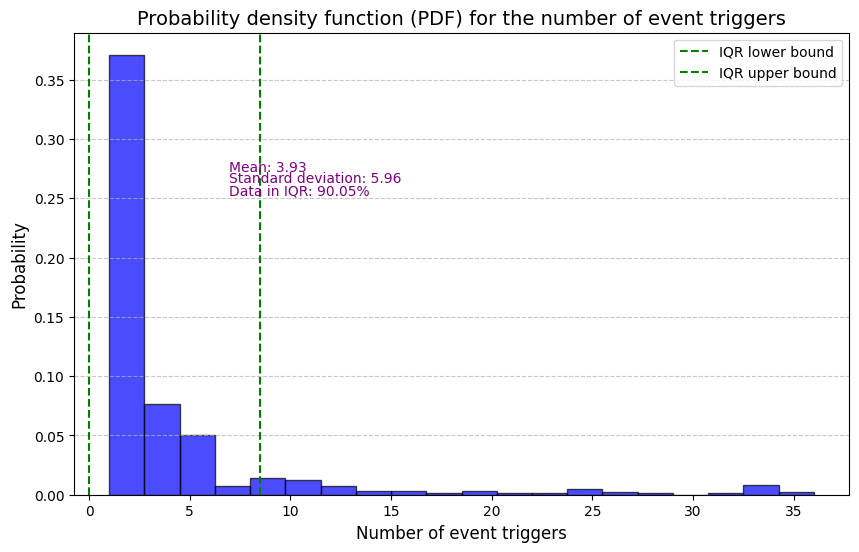

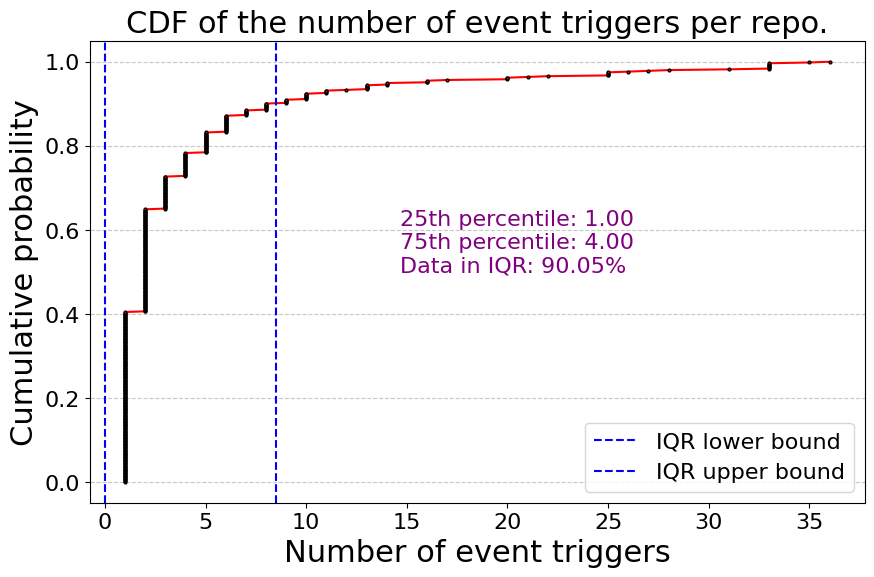

In [13]:
# extraer la columna 'count'
events_count_data = grouped_df['count']

# calcular el rango intercuartil (IQR)
Q1 = events_count_data.quantile(0.25)
Q3 = events_count_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límites del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR
iqr_lower_bound = max(0, iqr_lower_bound)
percentage_in_iqr = ((events_count_data >= iqr_lower_bound) & (events_count_data <= iqr_upper_bound)).mean() * 100

# PDF plot
fig_pdf, ax_pdf = plt.subplots(figsize=(10, 6))
ax_pdf.hist(events_count_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
ax_pdf.set_xlabel('Number of event triggers', fontsize=12)
ax_pdf.set_ylabel('Probability', fontsize=12)
ax_pdf.set_title('Probability density function (PDF) for the number of event triggers', fontsize=14)
ax_pdf.axvline(iqr_lower_bound, color='green', linestyle='--', label='IQR lower bound')
ax_pdf.axvline(iqr_upper_bound, color='green', linestyle='--', label='IQR upper bound')
ax_pdf.legend(loc='upper right', fontsize=10)
ax_pdf.tick_params(axis='both', labelsize=10)
ax_pdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_pdf.text(0.2, 0.7, 'Mean: {:.2f}'.format(events_count_data.mean()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.675, 'Standard deviation: {:.2f}'.format(events_count_data.std()), transform=ax_pdf.transAxes, fontsize=10, color='purple')
ax_pdf.text(0.2, 0.650, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_pdf.transAxes, fontsize=10, color='purple')
pdf_file = '../paper/figs/pdf_events_count_data.pdf'
fig_pdf.savefig(pdf_file, format='pdf', dpi=300)

# CDF plot with increased font sizes
fig_cdf, ax_cdf = plt.subplots(figsize=(10, 6))
sorted_data = np.sort(events_count_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax_cdf.plot(sorted_data, y, marker='.', linestyle='-', color='red', markersize=4, markeredgecolor='black')
ax_cdf.set_xlabel('Number of event triggers', fontsize=22)  # Increased font size
ax_cdf.set_ylabel('Cumulative probability', fontsize=22)  # Increased font size
ax_cdf.set_title('CDF of the number of event triggers per repo.', fontsize=22)  # Increased font size
ax_cdf.axvline(iqr_lower_bound, color='blue', linestyle='--', label='IQR lower bound')
ax_cdf.axvline(iqr_upper_bound, color='blue', linestyle='--', label='IQR upper bound')
ax_cdf.legend(loc='lower right', fontsize=16)  # Increased font size
ax_cdf.tick_params(axis='both', labelsize=16)  # Increased tick label font size
ax_cdf.grid(axis='y', linestyle='--', alpha=0.7)
ax_cdf.text(0.4, 0.6, '25th percentile: {:.2f}'.format(np.percentile(sorted_data, 25)), transform=ax_cdf.transAxes, fontsize=16, color='purple')  # Increased font size
ax_cdf.text(0.4, 0.55, '75th percentile: {:.2f}'.format(np.percentile(sorted_data, 75)), transform=ax_cdf.transAxes, fontsize=16, color='purple')  # Increased font size
ax_cdf.text(0.4, 0.5, f'Data in IQR: {percentage_in_iqr:.2f}%', transform=ax_cdf.transAxes, fontsize=16, color='purple')  # Increased font size
cdf_file = '../paper/figs/cdf_events_count_data.pdf'
fig_cdf.savefig(cdf_file, format='pdf', dpi=300)

# Display the plot
plt.show()